# U.S. Oil and Gas Production Analysis

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

## Loading Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib

## Loading Data sets

In [2]:
gas_df = pd.read_csv('./data/U.S._natural_gas_production.csv')
oil_df = pd.read_csv('./data/U.S._crude_oil_production.csv')

In [3]:
# Checking how many rows and columns in the dataframes
print(f"Natural Gas Shape: {gas_df.shape}")
print(f"Oil Shape: {oil_df.shape}")

Natural Gas Shape: (121, 20)
Oil Shape: (121, 36)


In [6]:
# Display all the available column names in the datafram
print(f"Natural Gas Columns: {gas_df.columns.tolist()}")
print(f"Oil Columns: {oil_df.columns.tolist()}")

Natural Gas Columns: ['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States', 'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah', 'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota', 'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California']
Oil Columns: ['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil', 'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York', 'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota', 'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee']


In [7]:
# Display additional info about each columns such as data types and number of non-null values
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

In [8]:
# Display additional info about each columns such as data types and number of non-null values
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Month                                      121 non-null    object
 1   U.S. Crude Oil                             121 non-null    int64 
 2   Alabama                                    121 non-null    int64 
 3   Alaska                                     121 non-null    int64 
 4   Arkansas                                   121 non-null    int64 
 5   Arizona                                    121 non-null    int64 
 6   California                                 121 non-null    int64 
 7   Colorado                                   121 non-null    int64 
 8   Federal Offshore Gulf of Mexico Crude Oil  121 non-null    int64 
 9   Federal Offshore Pacific Crude Oil         121 non-null    int64 
 10  Florida                               

Changing the Month column to a datetime object type

In [14]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')

In [16]:
oil_df['Month'] = pd.to_datetime(oil_df['Month'], format='%Y-%m-%d')

In [17]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [18]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

---

## Yearly Gas production
How much gas has been produced yearly by each US state, and by the US as a whole?
- To answer this question, we need to aggregate the rows based on the year of the Month column.

In [24]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


Text(0.5, 0, 'Year')

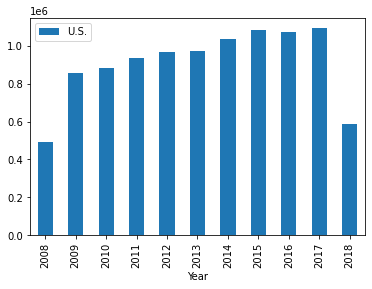

In [25]:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind='bar')
plot.set_xlabel('Year')

Missing full year data for 2008 and 2018

In [26]:
full_years = np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)
filtered_yearly_gas_df = yearly_gas_df[full_years]
filtered_yearly_gas_df.head()

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296


Text(0.5, 0, 'Year')

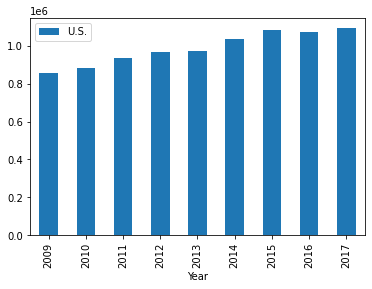

In [27]:
plot = filtered_yearly_gas_df.filter(items=['U.S.']).plot(kind='bar')
plot.set_xlabel('Year')

## State production

Let's have a look at the yearly production of some specific states

In [29]:
filtered_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

Text(0.5, 0, 'Year')

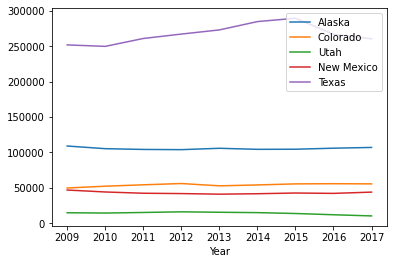

In [30]:
plot = filtered_yearly_gas_df.filter(items=['Alaska', 'Colorado', 'Utah', 'New Mexico', 'Texas']).plot()
plot.set_xlabel('Year')

---

## Comparing with Crude Oil Production

In [32]:
oil_df.head()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [35]:
yearly_oil_df = oil_df.groupby(oil_df['Month'].dt.year).sum()
yearly_oil_df

,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
Month,,,,,,,,,,,,,,,,,,,,,
2008,34211,149,4666,118,0,4095,589,7302,465,37,...,98,1286,56,35,1013,39,0,438,7773,7
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12
2010,65741,234,7199,189,0,6588,1086,18640,713,56,...,156,2239,108,53,1771,59,0,809,14026,12
2011,67829,275,6742,195,0,6449,1295,15805,652,67,...,156,2534,114,53,1795,72,0,864,17393,12
2012,78007,312,6310,214,0,6465,1626,15189,580,71,...,168,3095,144,60,1900,85,0,991,23742,12
2013,89585,342,6182,218,0,6540,2175,15068,610,72,...,264,3786,174,60,2088,237,0,1152,30475,12
2014,105064,323,5958,224,0,6729,3139,16761,608,73,...,495,4605,222,60,2501,340,0,1346,38049,12
2015,113179,318,5796,205,0,6619,4036,18174,378,72,...,876,5484,232,53,2842,380,0,1222,41335,12
2016,105970,266,5874,183,0,6101,3820,19177,201,63,...,705,5102,207,47,2380,251,0,1001,38140,12


In [44]:
yearly_oil_df.columns = yearly_oil_df.columns.str.strip()
yearly_oil_df.columns

Index(['U.S. Crude Oil', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

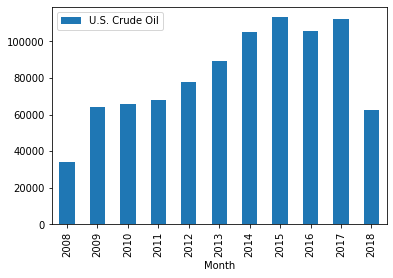

In [45]:
yearly_oil_df.filter(items=['U.S. Crude Oil']).plot(kind='bar');

In [46]:
full_years = np.logical_and(yearly_oil_df.index >= 2009, yearly_oil_df.index <= 2017)
filtered_yearly_oil_df = yearly_oil_df[full_years]

In [47]:
filtered_yearly_oil_df.head()

,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
Month,,,,,,,,,,,,,,,,,,,,,
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12
2010,65741,234,7199,189,0,6588,1086,18640,713,56,...,156,2239,108,53,1771,59,0,809,14026,12
2011,67829,275,6742,195,0,6449,1295,15805,652,67,...,156,2534,114,53,1795,72,0,864,17393,12
2012,78007,312,6310,214,0,6465,1626,15189,580,71,...,168,3095,144,60,1900,85,0,991,23742,12
2013,89585,342,6182,218,0,6540,2175,15068,610,72,...,264,3786,174,60,2088,237,0,1152,30475,12


Text(0.5, 0, 'Year')

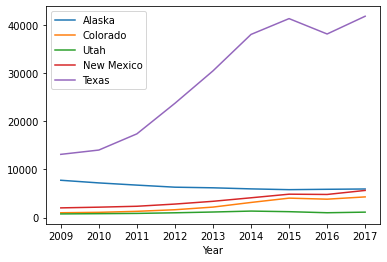

In [48]:
plot2 = filtered_yearly_oil_df.filter(items=['Alaska', 'Colorado', 'Utah', 'New Mexico', 'Texas']).plot()
plot2.set_xlabel('Year')

## Merging Oil and Gas Production

In [50]:
total_gas = filtered_yearly_gas_df.filter(items=['U.S.'])
total_gas.columns = [ 'Gas' ]
display(total_gas.head(3))



total_oil = filtered_yearly_oil_df.filter(items=['U.S. Crude Oil'])
total_oil.columns = [ 'Crude Oil' ]
total_oil.head(3)

,Gas
Month,
2009,856876
2010,881622
2011,936163


,Crude Oil
Month,
2009,64180
2010,65741
2011,67829


In [51]:
merged_df = pd.concat([total_oil, total_gas], axis='columns')
merged_df

,Crude Oil,Gas
Month,,
2009,64180,856876
2010,65741,881622
2011,67829,936163
2012,78007,968632
2013,89585,970617
2014,105064,1032439
2015,113179,1082158
2016,105970,1070085
2017,112205,1090730


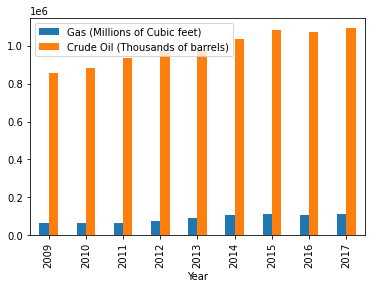

In [52]:
plot = merged_df.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)']);